In [1]:
import matplotlib.pyplot as plt

from hdf5storage import loadmat, savemat 

import numpy as np

from scipy.stats import sem

import networkx as nx



In [2]:
# load chan locs
dict_loc=loadmat('chan_locs/xyzlabels.mat')
x=dict_loc['x']
y=dict_loc['y']
z=dict_loc['z']
labels=dict_loc['labels']

#  construct text for networkx labels
labeldict = {}
for i in range(32):
    labeldict[i]=labels[i]

# construct 2d pos for networkx
pos=list()
for i in range(32):
    pos.append(np.array((x[i], y[i]))) 

In [3]:
# construct full edges_list
edges_list=list() # each edge is a two element tuple
for i in range(32):
    for j in range(32):
        if i<j: # use indicies to remove half of edges and colors and the diagonal
            edges_list.append((i,j))

In [4]:
# parameters for plotting
states4names=['Uncoupled','Leading','Following','Mutual']

In [5]:
# load data of the 4 states
outdict=loadmat('append_4states.mat')
append_4states=outdict["append_4states"]

In [6]:
# get mean and sem from 72 trials in each state
def get_mean_sem(st,freq,append_4states,edges_list):
    # not_connected_num=0
    num_edges=list(); transitivity_clus=list(); avg_clus=list(); 
    sw_sigma=list(); sw_omega=list()
    for trl in range(72):
        bool_mat=append_4states[st][trl][freq,:,:]
        # remove non-exist edges
        non0_edges=list()
        for i in range(len(edges_list)): # 496
            if bool_mat[edges_list[i][0],edges_list[i][1]] != 0:
                non0_edges.append(edges_list[i])
        # networkx initiate with edges
        X = nx.Graph()
        X.add_edges_from(non0_edges)

        # compute number of remaining edges
        num_edges.append(len(non0_edges))
        # compute transitivity
        transitivity_clus.append(nx.transitivity(X))
        # compute average clustering coefficient
        try:
            avg_clus.append(nx.average_clustering(X)) # when on clustering coefficient is 0 there will be zero division error
        except:
            avg_clus.append(0)

        # #compute small-world coefficients (including this will take 12 hours (2x72x4x30 min) to complete)
        # try:
        #     sw_sigma.append(nx.sigma(X, niter=15, nrand=10, seed=123)) # graph is not connected error
        #     sw_omega.append(nx.omega(X, niter=10, nrand=10, seed=123)) 
        # except:
        #     # sw_sigma.append(nan)
        #     # sw_omega.append(nan)
        #     not_connected_num=not_connected_num+1
        #     print(not_connected_num)

    num_edges_mean=np.mean(num_edges); num_edges_sem=sem(num_edges)
    transitivity_clus_mean=np.mean(transitivity_clus); transitivity_clus_sem=sem(transitivity_clus)
    avg_clus_mean=np.mean(avg_clus); avg_clus_sem=sem(avg_clus)
    # sw_sigma_mean=np.mean(sw_sigma); sw_sigma_sem=sem(sw_sigma) 
    # sw_omega_mean=sem(sw_omega); sw_omega_sem=sem(sw_omega)
    return num_edges_mean, num_edges_sem, transitivity_clus_mean, transitivity_clus_sem\
        , avg_clus_mean, avg_clus_sem#, sw_sigma_mean, sw_sigma_sem, sw_omega_mean, sw_omega_sem


In [7]:
# compute mean and sem 
num_edges_mean_4st=np.zeros((4,30)); num_edges_sem_4st=np.zeros((4,30))
transitivity_clus_mean_4st=np.zeros((4,30)); transitivity_clus_sem_4st=np.zeros((4,30))
avg_clus_mean_4st=np.zeros((4,30)); avg_clus_sem_4st=np.zeros((4,30))
# sw_sigma_mean_4st=np.zeros((4,30)); sw_sigma_sem_4st=np.zeros((4,30))
# sw_omega_mean_4st=np.zeros((4,30)); sw_omega_sem_4st=np.zeros((4,30))
for st in range(4):
    for freq in range(30):
        num_edges_mean, num_edges_sem, transitivity_clus_mean, transitivity_clus_sem\
        , avg_clus_mean, avg_clus_sem = get_mean_sem(st,freq,append_4states,edges_list)
        # sw_sigma_mean, sw_sigma_sem, sw_omega_mean, sw_omega_sem\
        num_edges_mean_4st[st][freq]=num_edges_mean
        num_edges_sem_4st[st][freq]=num_edges_sem
        transitivity_clus_mean_4st[st][freq]=transitivity_clus_mean
        transitivity_clus_sem_4st[st][freq]=transitivity_clus_sem
        avg_clus_mean_4st[st][freq]=avg_clus_mean 
        avg_clus_sem_4st[st][freq]=avg_clus_sem
        # sw_sigma_mean_4st[st][freq]=sw_sigma_mean
        # sw_sigma_sem_4st[st][freq]=sw_sigma_sem
        # sw_omega_mean_4st[st][freq]=sw_omega_mean
        # sw_omega_sem_4st[st][freq]=sw_omega_sem
        # print('complete one freq')


plotting

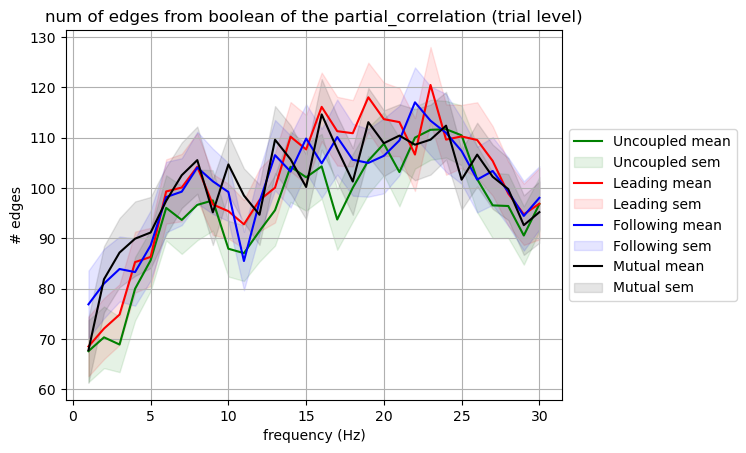

In [8]:
# plot number of edges with sem
color_4st=['green','red','blue','black']
for st in range(4):
    plt.plot (np.arange(30)+1,num_edges_mean_4st[st],color=color_4st[st])
    plt.fill_between(np.arange(30)+1,num_edges_mean_4st[st]-num_edges_sem_4st[st],\
                     num_edges_mean_4st[st]+num_edges_sem_4st[st],\
                        color=color_4st[st], alpha=.1)

plt.xlabel("frequency (Hz)")
plt.ylabel("# edges")


plt.title('num of edges from boolean of the partial_correlation (trial level)')
plt.grid()

plt.legend(['Uncoupled mean', 'Uncoupled sem', 'Leading mean', 'Leading sem',
    'Following mean', 'Following sem','Mutual mean','Mutual sem'],ncol=1,
    loc='center left', bbox_to_anchor=(1, 0.5))


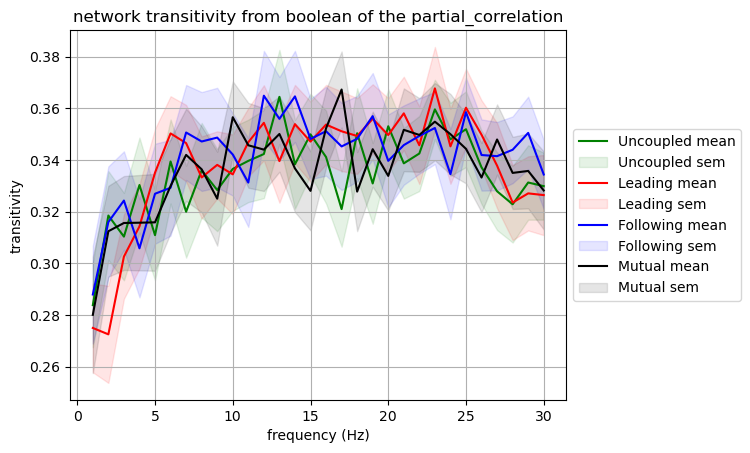

In [9]:
# plot transtivity
color_4st=['green','red','blue','black']
for st in range(4):
    plt.plot (np.arange(30)+1,transitivity_clus_mean_4st[st],color=color_4st[st])
    plt.fill_between(np.arange(30)+1,transitivity_clus_mean_4st[st]-transitivity_clus_sem_4st[st],\
                     transitivity_clus_mean_4st[st]+transitivity_clus_sem_4st[st],\
                        color=color_4st[st], alpha=.1)
# plt.xlim(1,30)
plt.xlabel("frequency (Hz)")
plt.ylabel("transitivity")


plt.title('network transitivity from boolean of the partial_correlation')
plt.grid()

plt.legend(['Uncoupled mean', 'Uncoupled sem', 'Leading mean', 'Leading sem',
    'Following mean', 'Following sem','Mutual mean','Mutual sem'],ncol=1,
    loc='center left', bbox_to_anchor=(1, 0.5))

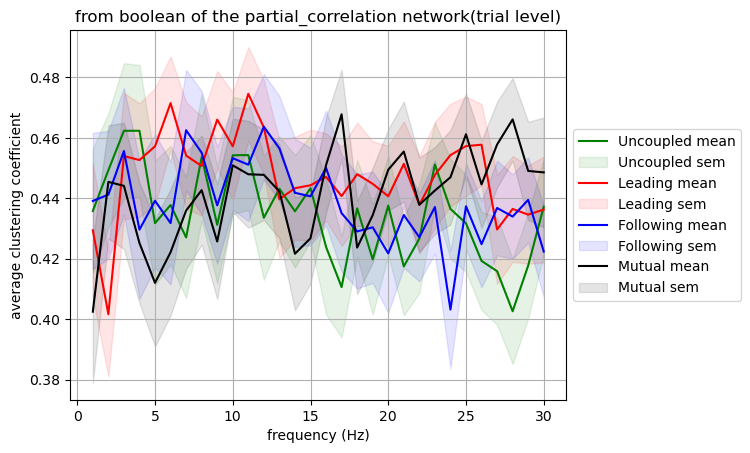

In [10]:
# plot clustering coef with sem
color_4st=['green','red','blue','black']
for st in range(4):
    plt.plot (np.arange(30)+1,avg_clus_mean_4st[st],color=color_4st[st])
    plt.fill_between(np.arange(30)+1,avg_clus_mean_4st[st]-avg_clus_sem_4st[st],\
                     avg_clus_mean_4st[st]+avg_clus_sem_4st[st],\
                        color=color_4st[st], alpha=.1)

plt.xlabel("frequency (Hz)")
plt.ylabel("average clustering coefficient")


plt.title('from boolean of the partial_correlation network(trial level)')
plt.grid()

plt.legend(['Uncoupled mean', 'Uncoupled sem', 'Leading mean', 'Leading sem',
    'Following mean', 'Following sem','Mutual mean','Mutual sem'],ncol=1,
    loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
# # plot small world coefficient sigma
# color_4st=['green','red','blue','black']
# for st in range(4):
#     plt.plot (np.arange(30)+1,sw_sigma_mean_4st[st],color=color_4st[st])
#     plt.fill_between(np.arange(30)+1,sw_sigma_mean_4st[st]-sw_sigma_sem_4st[st],\
#                      sw_sigma_mean_4st[st]+sw_sigma_sem_4st[st],\
#                         color=color_4st[st], alpha=.1)

# plt.xlabel("frequency (Hz)")
# plt.ylabel("small world coefficient sigma")


# plt.title('from boolean of the partial_correlation network(trial level)')
# plt.grid()

# plt.legend(['Uncoupled mean', 'Uncoupled sem', 'Leading mean', 'Leading sem',
#     'Following mean', 'Following sem','Mutual mean','Mutual sem'],ncol=1,
#     loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
# # plot small world coefficient omega
# color_4st=['green','red','blue','black']
# for st in range(4):
#     plt.plot (np.arange(30)+1,sw_omega_mean_4st[st],color=color_4st[st])
#     plt.fill_between(np.arange(30)+1,sw_omega_mean_4st[st]-sw_omega_sem_4st[st],\
#                      sw_omega_mean_4st[st]+sw_omega_sem_4st[st],\
#                         color=color_4st[st], alpha=.1)

# plt.xlabel("frequency (Hz)")
# plt.ylabel("small world coefficient omega")


# plt.title('from boolean of the partial_correlation network(trial level)')
# plt.grid()

# plt.legend(['Uncoupled mean', 'Uncoupled sem', 'Leading mean', 'Leading sem',
#     'Following mean', 'Following sem','Mutual mean','Mutual sem'],ncol=1,
#     loc='center left', bbox_to_anchor=(1, 0.5))